In [8]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
df = yf.download('INFY.NS', start = '2018-01-01', end = '2018-12-31')
df

NameError: name 'yf' is not defined

In [13]:
#creating the SMA  and the standard deviation
df['SMA'] = df.Close.rolling(window = 20).mean()
df['Std_dev'] = df.Close.rolling(window = 20).std()
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Std_dev
Date,,,,,,,,
2018-01-01,518.849976,522.250000,515.000000,516.775024,460.407745,5431340,NaN,NaN
2018-01-02,518.625000,521.000000,511.500000,514.849976,458.692688,6112248,NaN,NaN
2018-01-03,514.250000,515.799988,509.299988,510.649994,454.950775,6846552,NaN,NaN
2018-01-04,510.500000,510.500000,504.799988,507.700012,452.322601,8947614,NaN,NaN
2018-01-05,507.649994,513.200012,503.000000,506.000000,450.808044,11025976,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,646.200012,586.586548,12802132,670.932501,19.653055
2018-12-24,657.000000,658.799988,647.599976,649.000000,589.128296,8379825,672.310001,16.753910
2018-12-26,647.000000,647.000000,637.349976,644.049988,584.634949,6178552,672.567499,16.245246


In [14]:
#creating upper and lower bands 
df['upper_band'] = df.SMA + 2*df.Std_dev
df['lower_band'] = df.SMA - 2*df.Std_dev
df


,Open,High,Low,Close,Adj Close,Volume,SMA,Std_dev,upper_band,lower_band
Date,,,,,,,,,,
2018-01-01,518.849976,522.250000,515.000000,516.775024,460.407745,5431340,NaN,NaN,NaN,NaN
2018-01-02,518.625000,521.000000,511.500000,514.849976,458.692688,6112248,NaN,NaN,NaN,NaN
2018-01-03,514.250000,515.799988,509.299988,510.649994,454.950775,6846552,NaN,NaN,NaN,NaN
2018-01-04,510.500000,510.500000,504.799988,507.700012,452.322601,8947614,NaN,NaN,NaN,NaN
2018-01-05,507.649994,513.200012,503.000000,506.000000,450.808044,11025976,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,646.200012,586.586548,12802132,670.932501,19.653055,710.238610,631.626392
2018-12-24,657.000000,658.799988,647.599976,649.000000,589.128296,8379825,672.310001,16.753910,705.817820,638.802181
2018-12-26,647.000000,647.000000,637.349976,644.049988,584.634949,6178552,672.567499,16.245246,705.057990,640.077008


In [15]:
df['buy_signal'] = np.where(df.lower_band > df.Close, True, False)
df['sell_signal'] = np.where(df.upper_band < df.Close, True, False)
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,SMA,Std_dev,upper_band,lower_band,buy_signal,sell_signal
Date,,,,,,,,,,,,
2018-01-29,583.275024,598.125000,582.599976,591.450012,526.937622,10823002,547.982500,31.955378,611.893255,484.071744,False,False
2018-01-30,589.450012,591.549988,581.349976,585.325012,521.480652,8628312,551.409999,32.107860,615.625719,487.194279,False,False
2018-01-31,579.575012,583.299988,571.075012,575.125000,512.393188,9213698,554.423750,31.314610,617.052970,491.794531,False,False
2018-02-01,571.099976,578.950012,559.275024,572.299988,509.876312,13005454,557.506250,29.775363,617.056976,497.955524,False,False
2018-02-02,567.625000,581.450012,565.049988,571.625000,509.274933,10244486,560.702499,27.490889,615.684277,505.720722,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,646.200012,586.586548,12802132,670.932501,19.653055,710.238610,631.626392,False,False
2018-12-24,657.000000,658.799988,647.599976,649.000000,589.128296,8379825,672.310001,16.753910,705.817820,638.802181,False,False
2018-12-26,647.000000,647.000000,637.349976,644.049988,584.634949,6178552,672.567499,16.245246,705.057990,640.077008,False,False


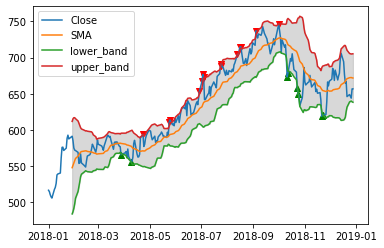

<Figure size 864x432 with 0 Axes>

In [16]:
plt.plot(df[['Close','SMA','lower_band','upper_band']])
plt.fill_between(df.index, df.upper_band, df.lower_band, color = 'grey', alpha = 0.3)
plt.legend(['Close','SMA','lower_band','upper_band'])
#plotting the signals and specifying markers 
plt.scatter(df.index[df.buy_signal], df[df.buy_signal].Close, marker = '^', color = 'green')
plt.scatter(df.index[df.sell_signal], df[df.sell_signal].Close, marker = 'v', color = 'red')
plt.figure(figsize = (12,6))
plt.show()

In [17]:
#lets define the open and close postitions and make this chart a bit more practical 
position = False 
buys = []
sells = []
#iterating over the rows of our dataframe 
for i in range(len(df)):
    if df.lower_band[i] > df.Close[i]:
        if position == False:
            buys.append(i)
            position = True
            
    elif df.upper_band[i] < df.Close[i]:
         if position == True:
            sells.append(i)
            position = False


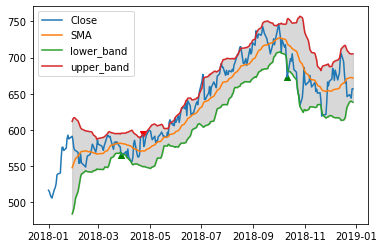

<Figure size 864x432 with 0 Axes>

In [18]:
#improved plot 
plt.plot(df[['Close','SMA','lower_band','upper_band']])
plt.fill_between(df.index, df.upper_band, df.lower_band, color = 'grey', alpha = 0.3)
plt.legend(['Close','SMA','lower_band','upper_band'])
#plotting the signals and specifying markers 
plt.scatter(df.iloc[buys].index , df.iloc[buys].Close, marker = '^', color = 'green')
plt.scatter(df.iloc[sells].index , df.iloc[sells].Close, marker = 'v', color = 'red')
plt.figure(figsize = (12,6))
plt.show()

In [19]:
#making a dataframe of buys, sells and calculating the profits

account = pd.concat([df.iloc[buys].Close,df.iloc[sells].Close], axis = 1)
account.columns = ['Buys', 'Sells']




In [20]:
profit = account.shift(-1).Sells - account.Buys

rel_profit = (account.shift(-1).Sells - account.Buys)/account.Buys
result = rel_profit.mean()
print(result)

0.04939026323742362
